Kelompok 4 :

 Adinda Fatimah Az-Zahra - 215150201111058

 Tsabita Muthia Ayu Pramesti - 215150201111070

 Shania Edina - 215150201111020

 Lintang Cahyaning Suikma - 215150201111056

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
df = pd.read_csv('/content/drive/My Drive/milknew.csv')
df.columns = ['pH','Temprature','Taste','Odor','Fat ','Turbidity','Colour','Grade']
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [ ]:
import pandas as pd

# Fungsi isnull() digunakan untuk mengecek nilai yang kosong (missing)
missing_values = df.isnull()

# Jumlah missing value pada setiap kolom
total_missing = missing_values.sum()

print("Total Missing Values per kolom:")
print(total_missing)


Total Missing Values per kolom:
pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64


In [ ]:
label = df['Grade']
data = df.drop('Grade', axis=1)
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)

print("Data Asli:\n", data)
print("Data yang Dinormalisasi:\n", normalized_data)


Data Asli:
        pH  Temprature  Taste  Odor  Fat   Turbidity  Colour
0     6.6          35      1     0     1          0     254
1     6.6          36      0     1     0          1     253
2     8.5          70      1     1     1          1     246
3     9.5          34      1     1     0          1     255
4     6.6          37      0     0     0          0     255
...   ...         ...    ...   ...   ...        ...     ...
1054  6.7          45      1     1     0          0     247
1055  6.7          38      1     0     1          0     255
1056  3.0          40      1     1     1          1     255
1057  6.8          43      1     0     1          0     250
1058  8.6          55      0     1     1          1     255

[1059 rows x 7 columns]
Data yang Dinormalisasi:
 [[0.55384615 0.01785714 1.         ... 1.         0.         0.93333333]
 [0.55384615 0.03571429 0.         ... 0.         1.         0.86666667]
 [0.84615385 0.64285714 1.         ... 1.         1.         0.4       

# Fungsi Training Backpropagation

In [ ]:
def sig(X):
  return [1 / (1 + np.exp(-x)) for x in X]
def sigd(X):
  output = []
  for i, x in enumerate(X):
      s = sig([x])[0]
      output.append(s * (1 - s))
  return output

In [ ]:
import time

def bp_fit(X, target, layer_conf, max_epoch, max_error=0.1, learn_rate=0.1, print_per_epoch=100):
    start_time = time.time()
    np.random.seed(1)
    nin = [np.empty(i) for i in layer_conf]
    n = [np.empty(j + 1) if i < len(layer_conf) - 1 else np.empty(j) for i, j in enumerate(layer_conf)]
    w = np.array([np.random.rand(layer_conf[i] + 1, layer_conf[i + 1]) for i in range(len(layer_conf) - 1)])
    dw = [np.empty((layer_conf[i] + 1, layer_conf[i + 1])) for i in range(len(layer_conf) - 1)]
    d = [np.empty(s) for s in layer_conf[1:]]
    din = [np.empty(s) for s in layer_conf[1:-1]]
    epoch = 0
    mse = 1

    for i in range(0, len(n)-1):
        n[i][-1] = 1

    while (max_epoch == -1 or epoch < max_epoch) and mse > max_error:
        epoch += 1
        mse = 0
        for r in range(len(X)):
            n[0][:-1] = X[r]
            for L in range(1, len(layer_conf)):
                nin[L] = np.dot(n[L-1], w[L-1])
                n[L][:len(nin[L])] = sig(nin[L])

            e = target[r] - n[-1]
            mse += sum(e ** 2)
            d[-1] = e * sigd(nin[-1])
            dw[-1] = learn_rate * d[-1] * n[-2].reshape((-1, 1))

            for L in range(len(layer_conf) - 1, 1, -1):
                din[L-2] = np.dot(d[L-1], np.transpose(w[L-1][:-1]))
                d[L-2] = din[L-2] * np.array(sigd(nin[L-1]))
                dw[L-2] = (learn_rate * d[L-2]) * n[L-2].reshape((-1, 1))

            w += dw

        mse /= len(X)
        if print_per_epoch > -1 and epoch % print_per_epoch == 0:
            print(f'Epoch {epoch}, MSE: {mse}')
    execution = time.time() - start_time
    print("Waktu eksekusi: %s detik" % execution)
    return w, epoch, mse


# Fungsi Testing Backpropagation

In [ ]:
def bp_predict(X, w):
    n = [np.empty(len(i)) for i in w]
    nin = [np.empty(len(i[0])) for i in w]
    predict = []
    n.append(np.empty(len(w[-1][0])))
    for x in X:
        n[0][:-1] = x
        for L in range(0, len(w)):
            nin[L] = np.dot(n[L], w[L])
            n[L + 1][:len(nin[L])] = sig(nin[L])
        predict.append(n[-1].copy())
    return predict

In [ ]:
import pandas as pd

# Melakukan one-hot encoding
one_hot_encoded = pd.get_dummies(label)

# Menggabungkan one-hot encoded dengan DataFrame asli
df = pd.concat([label, one_hot_encoded], axis=1)

# Menampilkan hasil
print("DataFrame setelah One-Hot Encoding:")
print(df)


DataFrame setelah One-Hot Encoding:
       Grade  high  low  medium
0       high     1    0       0
1       high     1    0       0
2        low     0    1       0
3        low     0    1       0
4     medium     0    0       1
...      ...   ...  ...     ...
1054  medium     0    0       1
1055    high     1    0       0
1056     low     0    1       0
1057    high     1    0       0
1058     low     0    1       0

[1059 rows x 4 columns]


In [ ]:
def onehot_enc_str(string_list):
    df = pd.get_dummies(string_list)
    onehot_list = df.values.tolist()
    return onehot_list

In [ ]:
def onehot_dec_str(onehot_list, unique_classes):
    df = pd.DataFrame(onehot_list, columns=unique_classes)
    decoded_list = df.idxmax(axis=1).tolist()
    return decoded_list

## Percobaan 1
hasil tertinggi

*   1 hidden layer dengan 3 neuron
*   learning rate = 0.5
* max epoch = 50
* max error = 0.1

akurasi = 0.9622641509433962 dengan 35 epoch yang dijalankan

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score

X = minmax_scale(normalized_data)
Y = onehot_enc_str(label)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25,random_state=30)
w, ep, mse = bp_fit(X_train, y_train, layer_conf=(7, 3, 3), learn_rate=.5, max_epoch=50, max_error=.1, print_per_epoch=25)

print(f'Epochs: {ep}, MSE: {mse}')

predict = bp_predict(X_test, w)
predict = onehot_dec_str(predict,label.unique())
y_test = onehot_dec_str(y_test,label.unique())
accuracy = accuracy_score(predict, y_test)

print('Output:', predict)
print('True :', y_test)
print('Accuracy:', accuracy)

<ipython-input-9-7b59625a484b>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w = np.array([np.random.rand(layer_conf[i] + 1, layer_conf[i + 1]) for i in range(len(layer_conf) - 1)])
<ipython-input-9-7b59625a484b>:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w += dw


Epoch 25, MSE: 0.15885350393737138
Waktu eksekusi: 8.092753887176514 detik
Epochs: 35, MSE: 0.09913660152710245
Output: ['low', 'low', 'low', 'high', 'high', 'low', 'low', 'medium', 'low', 'high', 'low', 'low', 'low', 'medium', 'high', 'high', 'high', 'medium', 'low', 'high', 'medium', 'high', 'medium', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'medium', 'low', 'high', 'high', 'medium', 'low', 'medium', 'low', 'high', 'high', 'low', 'low', 'high', 'medium', 'medium', 'medium', 'high', 'high', 'high', 'low', 'medium', 'high', 'low', 'low', 'high', 'low', 'medium', 'high', 'medium', 'high', 'medium', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'medium', 'high', 'low', 'low', 'high', 'low', 'low', 'high', 'low', 'low', 'low', 'medium', 'medium', 'medium', 'low', 'low', 'low', 'low', 'medium', 'low', 'low', 'low', 'high', 'low', 'low', 'high', 'medium', 'medium', 'high', 'low', 'low', 'medium', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'low', 'high', 'medium'

In [ ]:
from sklearn.metrics import classification_report

# Membuat laporan evaluasi
report = classification_report(y_test, predict)

# Menampilkan laporan evaluasi
print(report)


              precision    recall  f1-score   support

        high       0.86      1.00      0.93        63
         low       1.00      1.00      1.00       118
      medium       1.00      0.88      0.94        84

    accuracy                           0.96       265
   macro avg       0.95      0.96      0.95       265
weighted avg       0.97      0.96      0.96       265



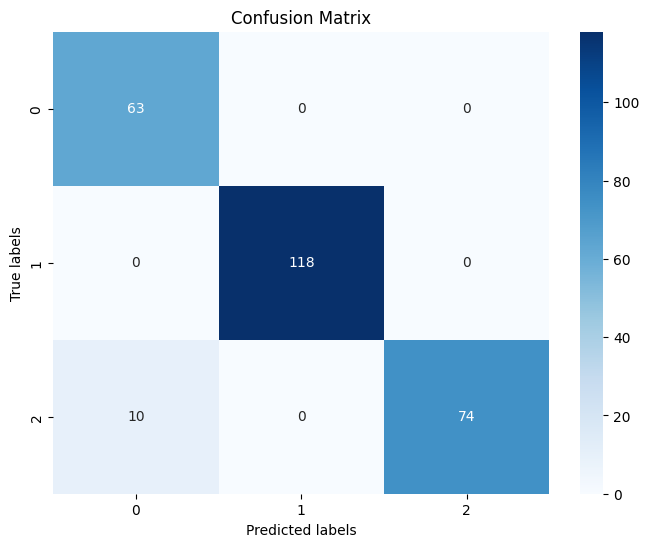

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Anda memiliki predict (hasil prediksi) dan y_test (label sebenarnya)

# Membuat matrix confusion
conf_matrix = confusion_matrix(y_test, predict)

# Visualisasi matrix confusion menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


## Percobaan 2
*   1 hidden layer dengan 3 neuron
*   learning rate = 0.1
* max epoch = 50
* max error = 0.1

akurasi = 0.8867924528301887 dengan 50 epoch yang dijalankan

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score

X = minmax_scale(normalized_data)
Y = onehot_enc_str(label)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25,random_state=30)
w, ep, mse = bp_fit(X_train, y_train, layer_conf=(7, 3, 3), learn_rate=.1, max_epoch=50, max_error=.1, print_per_epoch=25)

print(f'Epochs: {ep}, MSE: {mse}')

predict = bp_predict(X_test, w)
predict = onehot_dec_str(predict,label.unique())
y_test = onehot_dec_str(y_test,label.unique())
accuracy = accuracy_score(predict, y_test)

print('Output:', predict)
print('True :', y_test)
print('Accuracy:', accuracy)

<ipython-input-9-7b59625a484b>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w = np.array([np.random.rand(layer_conf[i] + 1, layer_conf[i + 1]) for i in range(len(layer_conf) - 1)])
<ipython-input-9-7b59625a484b>:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w += dw


Epoch 25, MSE: 0.36456890120090396
Epoch 50, MSE: 0.2678167996609215
Waktu eksekusi: 9.310830116271973 detik
Epochs: 50, MSE: 0.2678167996609215
Output: ['low', 'low', 'low', 'high', 'high', 'high', 'low', 'medium', 'low', 'high', 'low', 'high', 'low', 'medium', 'high', 'medium', 'high', 'medium', 'high', 'high', 'medium', 'high', 'medium', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'medium', 'low', 'high', 'high', 'medium', 'low', 'medium', 'low', 'high', 'high', 'low', 'low', 'high', 'medium', 'medium', 'medium', 'high', 'high', 'high', 'low', 'medium', 'low', 'high', 'low', 'high', 'low', 'medium', 'high', 'medium', 'high', 'medium', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'medium', 'high', 'low', 'low', 'high', 'low', 'low', 'high', 'low', 'low', 'low', 'medium', 'medium', 'medium', 'low', 'low', 'low', 'low', 'medium', 'low', 'low', 'low', 'high', 'low', 'low', 'high', 'medium', 'medium', 'high', 'low', 'low', 'medium', 'low', 'low', 'low', 'medium', 'medium'

In [ ]:
from sklearn.metrics import classification_report

# Membuat laporan evaluasi
report = classification_report(y_test, predict)

# Menampilkan laporan evaluasi
print(report)


              precision    recall  f1-score   support

        high       0.76      0.95      0.85        63
         low       0.92      0.92      0.92       118
      medium       0.97      0.80      0.88        84

    accuracy                           0.89       265
   macro avg       0.88      0.89      0.88       265
weighted avg       0.90      0.89      0.89       265



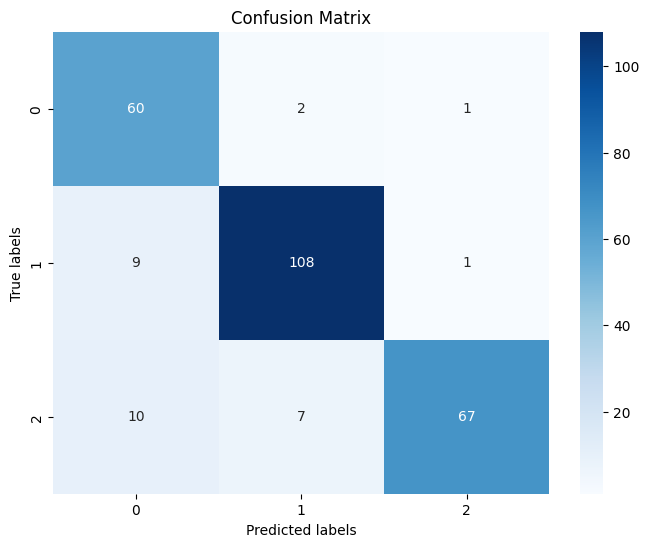

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Anda memiliki predict (hasil prediksi) dan y_test (label sebenarnya)

# Membuat matrix confusion
conf_matrix = confusion_matrix(y_test, predict)

# Visualisasi matrix confusion menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


## Percobaan 3
*   1 hidden layer dengan 3 neuron
*   learning rate = 0.1
* max epoch = 500
* max error = 0.1

akurasi = 0.8981132075471698 dengan 500 epoch yang dijalankan

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score

X = minmax_scale(normalized_data)
Y = onehot_enc_str(label)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25,random_state=30)
w, ep, mse = bp_fit(X_train, y_train, layer_conf=(7, 3, 3), learn_rate=.1, max_epoch=500, max_error=.1, print_per_epoch=25)

print(f'Epochs: {ep}, MSE: {mse}')

predict = bp_predict(X_test, w)
predict = onehot_dec_str(predict,label.unique())
y_test = onehot_dec_str(y_test,label.unique())
accuracy = accuracy_score(predict, y_test)

print('Output:', predict)
print('True :', y_test)
print('Accuracy:', accuracy)

<ipython-input-9-7b59625a484b>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w = np.array([np.random.rand(layer_conf[i] + 1, layer_conf[i + 1]) for i in range(len(layer_conf) - 1)])
<ipython-input-9-7b59625a484b>:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w += dw


Epoch 25, MSE: 0.36456890120090396
Epoch 50, MSE: 0.2678167996609215
Epoch 75, MSE: 0.22380746128804838
Epoch 100, MSE: 0.19740105565019556
Epoch 125, MSE: 0.18173948435690454
Epoch 150, MSE: 0.17280010568769785
Epoch 175, MSE: 0.16679942172161003
Epoch 200, MSE: 0.1610989869044528
Epoch 225, MSE: 0.14797052469073943
Epoch 250, MSE: 0.14028877872479964
Epoch 275, MSE: 0.1354450918086572
Epoch 300, MSE: 0.1319411430704718
Epoch 325, MSE: 0.12941808296033008
Epoch 350, MSE: 0.12750920756658224
Epoch 375, MSE: 0.12598887755395846
Epoch 400, MSE: 0.12473491495693827
Epoch 425, MSE: 0.12367420708979412
Epoch 450, MSE: 0.12275930526940206
Epoch 475, MSE: 0.12195769875934295
Epoch 500, MSE: 0.12124621323682992
Waktu eksekusi: 41.85011959075928 detik
Epochs: 500, MSE: 0.12124621323682992
Output: ['low', 'low', 'low', 'high', 'high', 'medium', 'low', 'medium', 'low', 'high', 'low', 'medium', 'low', 'medium', 'high', 'high', 'medium', 'medium', 'medium', 'high', 'medium', 'high', 'medium', 'low'

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, predict)

print(report)


              precision    recall  f1-score   support

        high       0.85      0.89      0.87        63
         low       0.97      0.92      0.95       118
      medium       0.84      0.87      0.85        84

    accuracy                           0.90       265
   macro avg       0.89      0.89      0.89       265
weighted avg       0.90      0.90      0.90       265



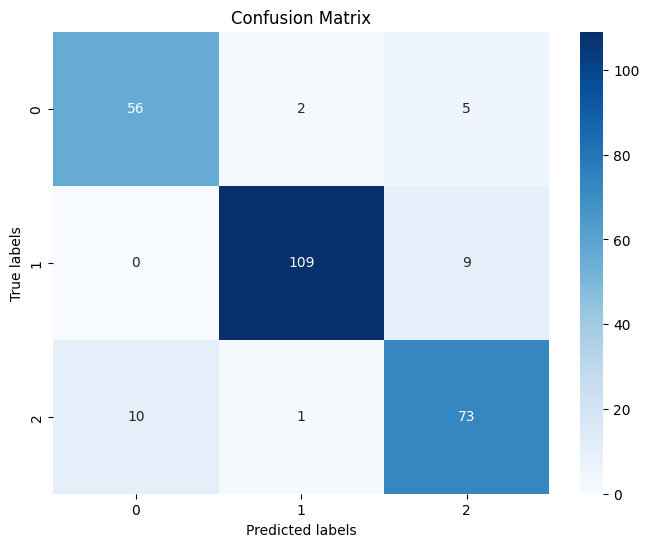

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Anda memiliki predict (hasil prediksi) dan y_test (label sebenarnya)

# Membuat matrix confusion
conf_matrix = confusion_matrix(y_test, predict)

# Visualisasi matrix confusion menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


## Percobaan 4
*   1 hidden layer dengan 5 neuron
*   learning rate = 0.1
* max epoch = 100
* max error = 0.1

akurasi = 0.9622641509433962 dengan 100 epoch yang dijalankan

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score

X = minmax_scale(normalized_data)
Y = onehot_enc_str(label)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25,random_state=30)
w, ep, mse = bp_fit(X_train, y_train, layer_conf=(7, 5, 3), learn_rate=.1, max_epoch=100, max_error=.1, print_per_epoch=25)

print(f'Epochs: {ep}, MSE: {mse}')

predict = bp_predict(X_test, w)
predict = onehot_dec_str(predict,label.unique())
y_test = onehot_dec_str(y_test,label.unique())
accuracy = accuracy_score(predict, y_test)

print('Output:', predict)
print('True :', y_test)
print('Accuracy:', accuracy)

<ipython-input-9-7b59625a484b>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w = np.array([np.random.rand(layer_conf[i] + 1, layer_conf[i + 1]) for i in range(len(layer_conf) - 1)])
<ipython-input-9-7b59625a484b>:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w += dw


Epoch 25, MSE: 0.33401155703290425
Epoch 50, MSE: 0.22152029994408898
Epoch 75, MSE: 0.1499417990461142
Epoch 100, MSE: 0.11001035232843821
Waktu eksekusi: 11.596190452575684 detik
Epochs: 100, MSE: 0.11001035232843821
Output: ['low', 'low', 'low', 'high', 'high', 'low', 'low', 'medium', 'low', 'high', 'low', 'low', 'low', 'medium', 'high', 'high', 'high', 'medium', 'low', 'high', 'medium', 'high', 'medium', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'medium', 'low', 'high', 'high', 'medium', 'low', 'medium', 'low', 'high', 'high', 'low', 'low', 'high', 'medium', 'medium', 'medium', 'high', 'high', 'high', 'low', 'medium', 'high', 'low', 'low', 'high', 'low', 'medium', 'high', 'medium', 'high', 'medium', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'medium', 'high', 'low', 'low', 'high', 'low', 'low', 'high', 'low', 'low', 'low', 'medium', 'medium', 'medium', 'low', 'low', 'low', 'low', 'medium', 'low', 'low', 'low', 'high', 'low', 'low', 'high', 'medium', 'medium', 'h

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, predict)

print(report)


              precision    recall  f1-score   support

        high       0.86      1.00      0.93        63
         low       1.00      1.00      1.00       118
      medium       1.00      0.88      0.94        84

    accuracy                           0.96       265
   macro avg       0.95      0.96      0.95       265
weighted avg       0.97      0.96      0.96       265



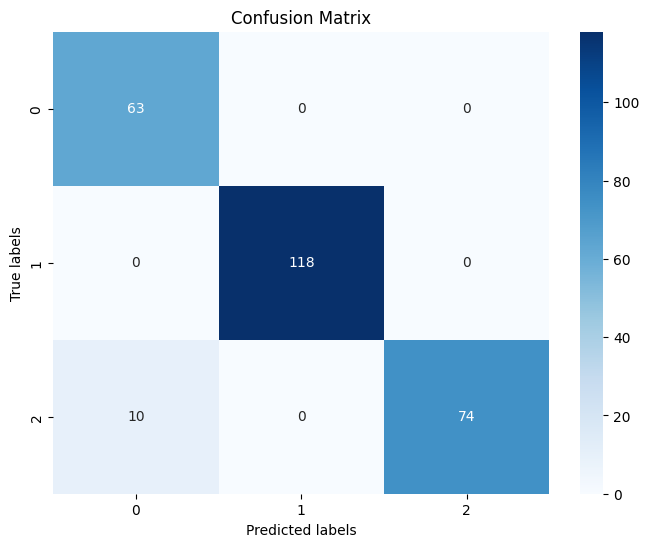

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Anda memiliki predict (hasil prediksi) dan y_test (label sebenarnya)

# Membuat matrix confusion
conf_matrix = confusion_matrix(y_test, predict)

# Visualisasi matrix confusion menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
